In [1]:
%load_ext autoreload
%autoreload 2

from ryn.common import helper
helper.notebook()

changing directory


In [2]:
from ryn.embers import keen
from ryn.graphs import split

import pathlib
path = pathlib.Path('data/split/oke.fb15k237_0.50-0.70_50_30061990/')

ds = split.Dataset.load(path)
tfs = keen.triples_factory(ds)

You're trying to map triples with 16 entities and 0 relations that are not in the training set. These triples will be excluded from the mapping.
In total 16 from 41910 triples were filtered out


In [ ]:
kwargs = dict(
    model = 'DistMult',
    model_kwargs = dict(embedding_dim = 256),
    training_kwargs=dict(num_epochs=1000),
    stopper='early',
    stopper_kwargs=dict(frequency=5, patience=2, delta=0.0002),
)

res = keen.train(tfs=tfs, **kwargs)
path = ds.path / 'models' / f'{kwargs["model"]}-{kwargs["model_kwargs"]["embedding_dim"]}'
res.save_to_directory(str(path))

INFO:pykeen.training.training_loop:using stopper: EarlyStopper(evaluator=<pykeen.evaluation.rank_based_evaluator.RankBasedEvaluator object at 0x7f9c661f5610>, evaluation_triples_factory=TriplesFactory(path="<None>"), evaluation_batch_size=None, evaluation_slice_size=None, frequency=5, patience=2, metric='hits_at_k', delta=0.0002, buffer=array([6., 4.]), number_evaluations=0, larger_is_better=True, improvement_criterion=<function larger_than_any_buffer_element at 0x7f9b7c2b4430>, result_tracker=<pykeen.trackers.ResultTracker object at 0x7f9c661f5490>, stopped=False)


INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=256.
INFO:pykeen.evaluation.evaluator:Evaluation took 13.14s seconds


INFO:pykeen.evaluation.evaluator:Evaluation took 13.22s seconds


INFO:pykeen.evaluation.evaluator:Evaluation took 13.33s seconds


INFO:pykeen.evaluation.evaluator:Evaluation took 13.26s seconds


INFO:pykeen.evaluation.evaluator:Evaluation took 13.33s seconds


INFO:pykeen.evaluation.evaluator:Evaluation took 13.31s seconds


INFO:pykeen.evaluation.evaluator:Evaluation took 13.34s seconds


INFO:pykeen.evaluation.evaluator:Evaluation took 13.29s seconds


INFO:pykeen.evaluation.evaluator:Evaluation took 13.32s seconds


INFO:pykeen.evaluation.evaluator:Evaluation took 13.30s seconds


In [43]:
from pprint import pprint
res.metric_results.to_df()

,Type,Metric,Value
0,avg,adjusted_mean_rank,0.368057
1,best,mean_rank,1695.761009
2,best,mean_reciprocal_rank,0.103004
3,best,hits_at_1,0.057569
4,best,hits_at_3,0.121031
5,best,hits_at_5,0.144580
6,best,hits_at_10,0.180071
7,worst,mean_rank,1695.761201
8,worst,mean_reciprocal_rank,0.103004
9,worst,hits_at_1,0.057569


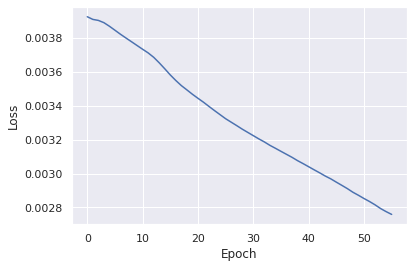

In [44]:
res.plot_losses()